<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/Copy_of_DECISIONTREEASSIGNMENT_ObesityClassification_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obesity Classification Dataset

In [ ]:
#import necessary  libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/decisiontree/ObesityClassification.csv')


In [ ]:


# Load the dataset


# Display basic info and first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


(None,
    ID  Age  Gender  Height  Weight   BMI          Label
 0   1   25    Male     175      80  25.3  Normal Weight
 1   2   30  Female     160      60  22.5  Normal Weight
 2   3   35    Male     180      90  27.3     Overweight
 3   4   40  Female     150      50  20.0    Underweight
 4   5   45    Male     190     100  31.2          Obese)

** Dataset Overview**
Rows: 108

Columns: 7

Features:

ID: Identifier (likely not useful for modeling)

Age, Height, Weight, BMI: Numeric features

Gender: Categorical

Label: Target class (e.g., Normal Weight, Overweight, etc.)

**We’ll proceed with the following:**

Drop the ID column

Encode categorical variables (Gender & Label)

Visualize features for exploration

Split into train/test sets

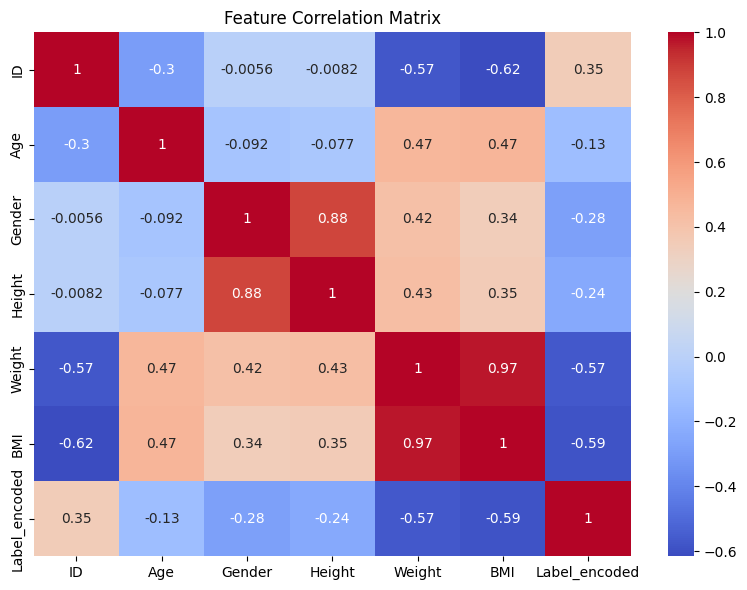

(   Gender          Label  Label_encoded
 0       1  Normal Weight              0
 1       0  Normal Weight              0
 2       1     Overweight              2
 3       0    Underweight              3
 4       1          Obese              1,
 {'Normal Weight': np.int64(0),
  'Obese': np.int64(1),
  'Overweight': np.int64(2),
  'Underweight': np.int64(3)})

In [ ]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_label = LabelEncoder()
df['Label_encoded'] = le_label.fit_transform(df['Label'])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['Label']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

# Display unique labels and encoded mappings
label_mapping = dict(zip(le_label.classes_, le_label.transform(le_label.classes_)))
df[['Gender', 'Label', 'Label_encoded']].head(), label_mapping

**Preprocessing Done:**
Dropped the ID column.

Encoded:

Gender: Male = 1, Female = 0

Label (target):

Normal Weight → 0

Obese → 1

Overweight → 2

Underweight → 3

**Correlation Insights:**
BMI is strongly correlated with Weight and moderately with Height and Age.

Gender has low correlation with the numerical features, but we’ll keep it to observe its impact.

**Next, we’ll:**

Split the data into training and testing sets

Build a Decision Tree Classifier

Evaluate the model

In [ ]:
# Features and target
X = df.drop(columns=['Label', 'Label_encoded'])
y = df['Label_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
report = classification_report(y_test, y_pred, target_names=le_label.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix

('               precision    recall  f1-score   support\n\nNormal Weight       1.00      0.67      0.80         6\n        Obese       1.00      1.00      1.00         4\n   Overweight       0.67      1.00      0.80         4\n  Underweight       1.00      1.00      1.00         8\n\n     accuracy                           0.91        22\n    macro avg       0.92      0.92      0.90        22\n weighted avg       0.94      0.91      0.91        22\n',
 array([[4, 0, 2, 0],
        [0, 4, 0, 0],
        [0, 0, 4, 0],
        [0, 0, 0, 8]]))

In [ ]:
# Features and target
X = df.drop(columns=['Label', 'Label_encoded'])
y = df['Label_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
report = classification_report(y_test, y_pred, target_names=le_label.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix

('               precision    recall  f1-score   support\n\nNormal Weight       1.00      0.67      0.80         6\n        Obese       1.00      1.00      1.00         4\n   Overweight       0.67      1.00      0.80         4\n  Underweight       1.00      1.00      1.00         8\n\n     accuracy                           0.91        22\n    macro avg       0.92      0.92      0.90        22\n weighted avg       0.94      0.91      0.91        22\n',
 array([[4, 0, 2, 0],
        [0, 4, 0, 0],
        [0, 0, 4, 0],
        [0, 0, 0, 8]]))

Classification Report:
               precision  recall  f1-score  support
Normal Weight       1.00    0.67      0.80     6.00
Obese               1.00    1.00      1.00     4.00
Overweight          0.67    1.00      0.80     4.00
Underweight         1.00    1.00      1.00     8.00
accuracy            0.91    0.91      0.91     0.91
macro avg           0.92    0.92      0.90    22.00
weighted avg        0.94    0.91      0.91    22.00


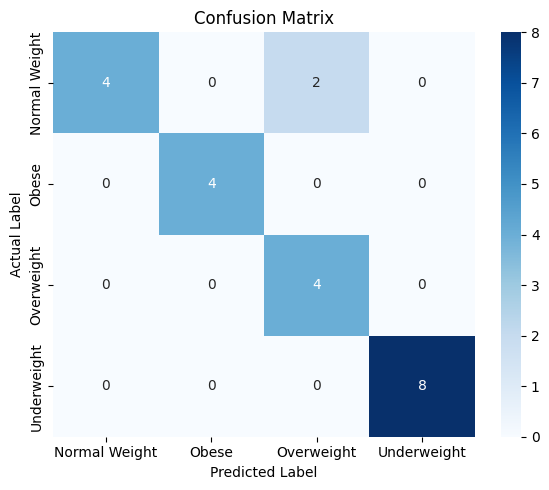

In [ ]:
# Features and target
X = df.drop(columns=['Label', 'Label_encoded'])
y = df['Label_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
report = classification_report(y_test, y_pred, target_names=le_label.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

#report, conf_matrix

from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred, target_names=le_label.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(2)

# Display the report as a table
print("\033[1mClassification Report:\033[0m")
print(report_df)
#rint("Classification Report:")
#rint(report_df)

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert to DataFrame for better formatting
conf_df = pd.DataFrame(conf_matrix, index=le_label.classes_, columns=le_label.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_df, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

In [ ]:
#Accuracy Percentage
from sklearn.metrics import accuracy_score

# y_test: true labels
# y_pred: predicted labels

accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100  # Convert to percentage

print(f"\033[1mAccuracy: {accuracy_percent:.2f}%\033[0m*")

Accuracy: 90.91%*


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(clf_entropy, feature_names=list(X.columns), show_weights=True)
print("\033[1mDecision Tree Rules (with Entropy/Gain):\033[0m")
print(tree_rules)

Decision Tree Rules (with Entropy/Gain):
|--- Weight <= 52.50
|   |--- weights: [0.00, 0.00, 0.00, 39.00] class: 3
|--- Weight >  52.50
|   |--- BMI <= 24.60
|   |   |--- weights: [22.00, 0.00, 0.00, 0.00] class: 0
|   |--- BMI >  24.60
|   |   |--- Weight <= 97.50
|   |   |   |--- Weight <= 82.50
|   |   |   |   |--- weights: [1.00, 0.00, 2.00, 0.00] class: 2
|   |   |   |--- Weight >  82.50
|   |   |   |   |--- weights: [0.00, 0.00, 14.00, 0.00] class: 2
|   |   |--- Weight >  97.50
|   |   |   |--- weights: [0.00, 8.00, 0.00, 0.00] class: 1



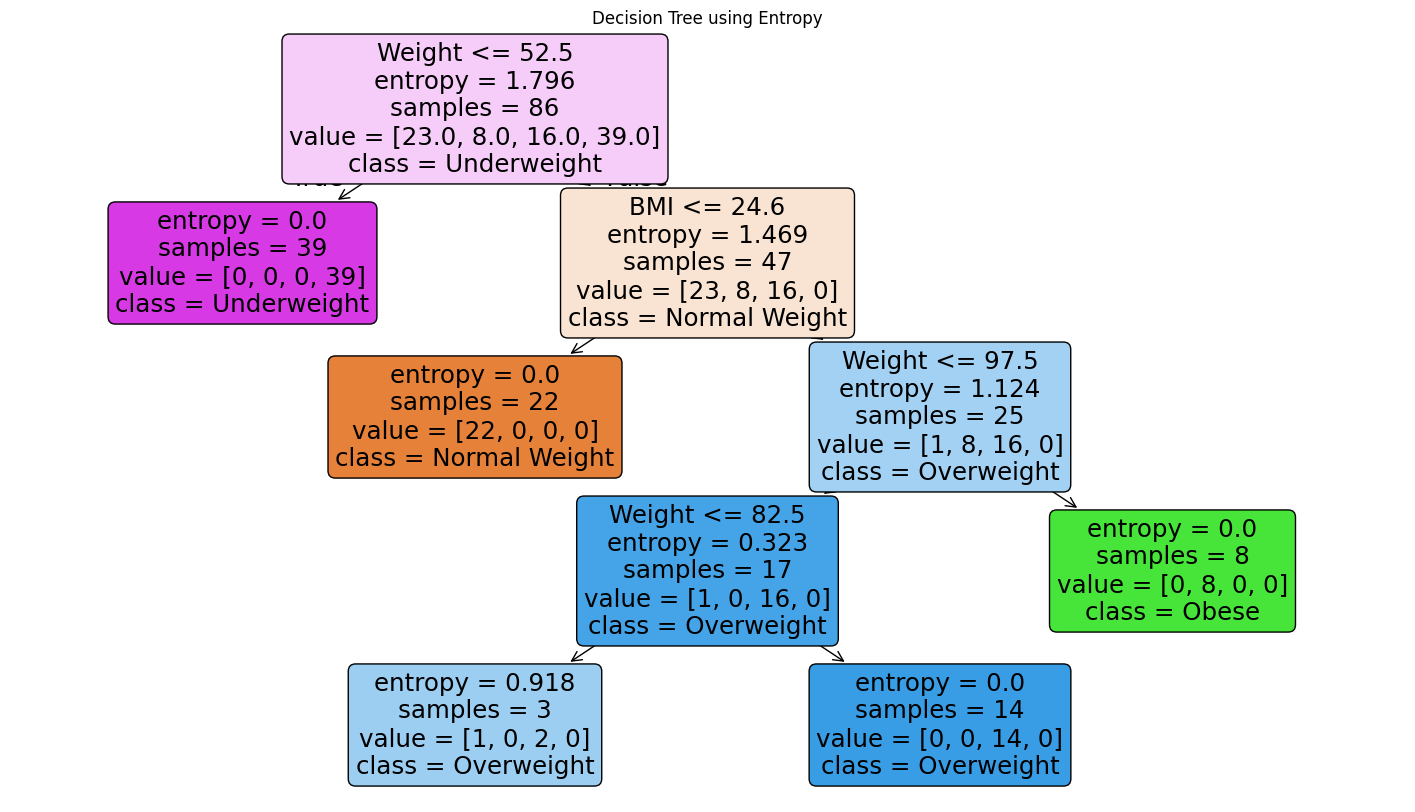

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
plot_tree(clf_entropy, feature_names=X.columns, class_names=le_label.classes_, filled=True, rounded=True)
plt.title("Decision Tree using Entropy")
plt.show()